# 딥러닝 개념 익히기


<center><img src = "https://github.com/Jangrae/img/blob/master/boston.png?raw=true" width=800/></center>

## **1. 환경 준비**

### (1) 라이브러리 불러오기

In [1]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

%config InlineBackend.figure_format='retina'

### (2) 데이터 준비

In [2]:
# 데이터 준비
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/boston.csv'
data = pd.read_csv(path)
data.drop(['black'], axis=1, inplace=True)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**데이터 설명**

- crim: 자치시(Town)별 1인당 범죄율
- zn: 25,000 평방피트를 초과하는 거주지역 비율
- indus: 비소매상업지역이 점유하고 있는 토지 비율
- chas: 찰스강에 대한 더미 변수 (= 1 강 경계에 위치; 0 나머지)
- nox: 10ppm당 농축 일산화질소
- rm: 주택 1가구당 평균 방 개수
- age: 1940년 이전에 건축된 소유주택 비율
- dis: 5개 보스턴 직업센터까지 접근성 지수
- rad: 방사형 도로까지의 접근성 지수
- tax: 10,000달러 당 재산세율
- ptratio: 자치시(Town)별 학생/교사 비율
- lstat: 모집단 하위 계층의 비율(%)
- medv: 본인 소유 주택가격(중앙값) (단위:$1,000)

## **2. 학습 절차 익히기**

### (1) 데이터 전처리

In [3]:
# 학습을 위한 데이터 분할
target = 'medv'
features = ['lstat']
x = data.loc[:, features]
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=1)

# 스케일링
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
y_train_s = (y_train - y_train.min())/(y_train.max() - y_train.min())

### (2) 학습 절차 시각화 함수

- 함수 생성
    - 아래 함수는 내용을 이해하려고 하지 마시고 그냥 생성해 주세요.
    - 눈으로 보여주기 위해서 만든 것입니다. 사용만 할 겁니다.

In [4]:
# 함수 만들기
def dl_visualize(ep, lr) :
    clear_session()

    model = Sequential([
        Input(shape=(1, )),
        Dense(1)
    ])
    model.compile(loss='mse', optimizer=Adam(learning_rate=lr))
    mcp = ModelCheckpoint(filepath='/content/{epoch:d}.weights.h5',
                          monitor='val_loss', save_best_only=False, save_weights_only=True)

    history = model.fit(x_train_s, y_train_s, verbose=0, epochs=ep, callbacks=[mcp]).history

    coef,intercept = [], []

    for i in range(ep) :
        file = f'/content/{i+1}.weights.h5'
        model.load_weights(file)
        coef.append(np.array(model.weights[0])[0, 0])
        intercept.append(np.array(model.weights[1])[0])

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=x_train_s.reshape(-1, ), y=y_train_s, alpha=.5)
    plt.xlabel('lstat')
    for i in range(ep):
        x = np.linspace(0, 1, 10)
        y = coef[i] * x + intercept[i]
        plt.plot(x, y, 'r--', linewidth=0.5)
        v = 1.005
        plt.text(v, coef[i]*v+intercept[i], f'{i+1}', color='r', size=8)

    plt.subplot(1, 2, 2)
    plt.plot(range(1, ep+1), history['loss'], linewidth=0.5, label='train_err', marker='.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.tight_layout()
    plt.show()

### (3) 학습 절차 눈으로 확인

#### 1) 실험 1

- epochs를 조절해 봅니다.
    - lr = 0.01로 고정시켜 놓고
    - ep를 5, 10, 15 로 조정하며 실행해 봅니다.


C:\Users\User\AppData\Local\Temp\ipykernel_20276\1712968193.py:20: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  coef.append(np.array(model.weights[0])[0, 0])
C:\Users\User\AppData\Local\Temp\ipykernel_20276\1712968193.py:21: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  intercept.append(np.array(model.weights[1])[0])


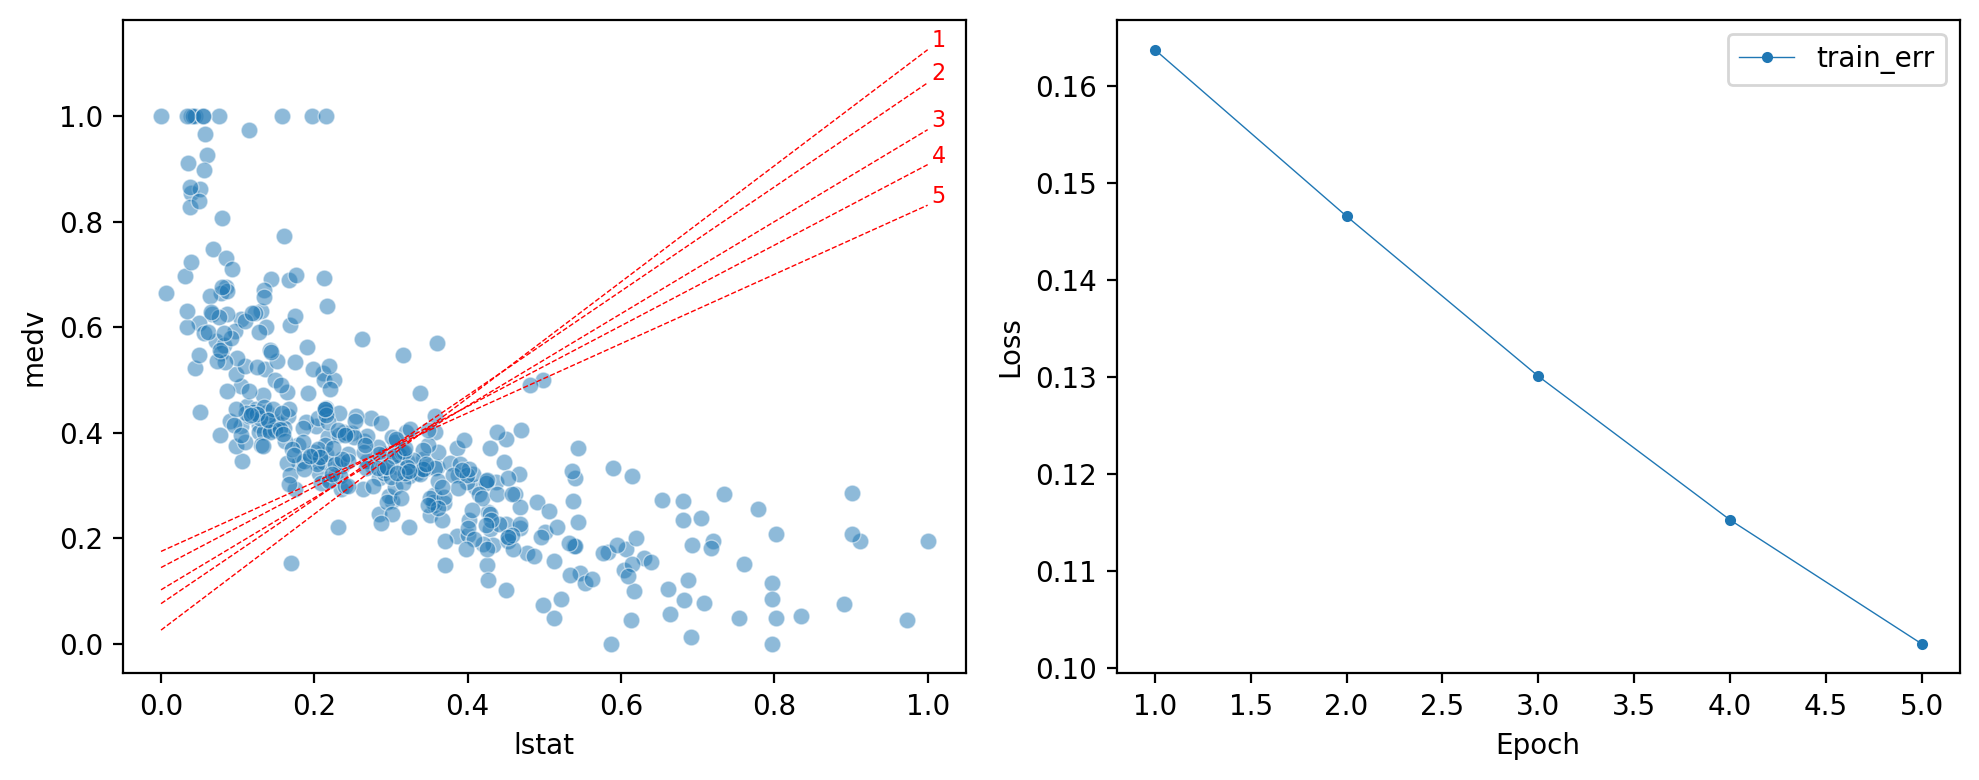

In [5]:
# 실험
dl_visualize(ep=5, lr=0.01)

#### 2) 실험2

- epochs를 조절해 봅니다.
    - ep = 20으로 고정시켜 놓고
    - lr을 0.001, 0.01, 0.05, 0.1 로 조정하며 실행해 봅니다.


C:\Users\User\AppData\Local\Temp\ipykernel_20276\1712968193.py:20: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  coef.append(np.array(model.weights[0])[0, 0])
C:\Users\User\AppData\Local\Temp\ipykernel_20276\1712968193.py:21: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  intercept.append(np.array(model.weights[1])[0])


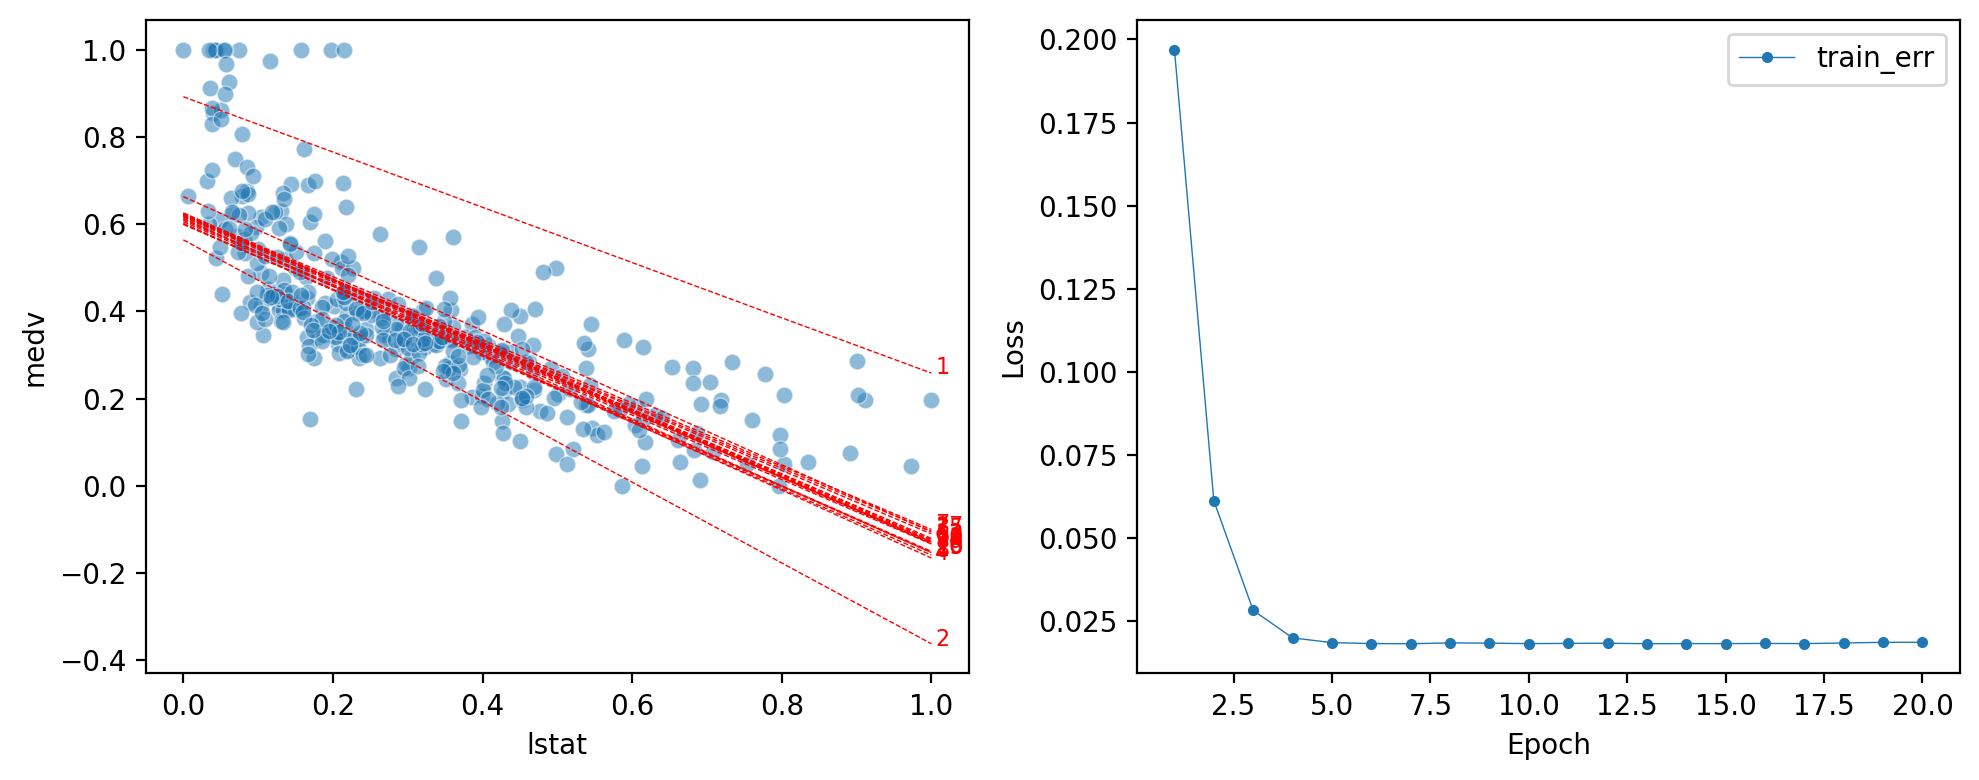

In [6]:
# 실험
dl_visualize(ep=20, lr=0.1)